In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,LSTM,Dropout,Activation
import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [247]:
#matplotlib inline
plt.rcParams['figure.figsize'] = 16,6
plt.rcParams['xtick.color'] = 'w'  
plt.rcParams['ytick.color'] = 'w'  
mpl.style.use('ggplot')

## 数据导入和处理

In [248]:
train_df_path = r'../data/processed_data/train_df.csv'
test_df_path = r'../data/processed_data/test_df.csv'

In [249]:
train_df = pd.read_csv(train_df_path,index_col=0) #第一列作为index
test_df = pd.read_csv(test_df_path,index_col=0)

In [250]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20631 entries, 0 to 20630
Data columns (total 28 columns):
id            20631 non-null int64
cycle         20631 non-null int64
setting1      20631 non-null float64
setting2      20631 non-null float64
setting3      20631 non-null float64
s1            20631 non-null float64
s2            20631 non-null float64
s3            20631 non-null float64
s4            20631 non-null float64
s5            20631 non-null float64
s6            20631 non-null float64
s7            20631 non-null float64
s8            20631 non-null float64
s9            20631 non-null float64
s10           20631 non-null float64
s11           20631 non-null float64
s12           20631 non-null float64
s13           20631 non-null float64
s14           20631 non-null float64
s15           20631 non-null float64
s16           20631 non-null float64
s17           20631 non-null float64
s18           20631 non-null float64
s19           20631 non-null float64
s20    

In [251]:
train_df.head() ##view the first 5 lines

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,cycle_norm,RUL
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,0.00000,130
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,0.00277,130
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,0.00554,130
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,0.00831,130
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,0.01108,130


In [252]:
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,cycle_norm,RUL
0,1,1,0.632184,0.750000,0.0,0.0,0.545181,0.310661,0.269413,0.0,...,0.132160,0.308965,0.0,0.333333,0.0,0.0,0.558140,0.661834,0.00000,142
1,1,2,0.344828,0.250000,0.0,0.0,0.150602,0.379551,0.222316,0.0,...,0.204768,0.213159,0.0,0.416667,0.0,0.0,0.682171,0.686827,0.00277,141
2,1,3,0.517241,0.583333,0.0,0.0,0.376506,0.346632,0.322248,0.0,...,0.155640,0.458638,0.0,0.416667,0.0,0.0,0.728682,0.721348,0.00554,140
3,1,4,0.741379,0.500000,0.0,0.0,0.370482,0.285154,0.408001,0.0,...,0.170090,0.257022,0.0,0.250000,0.0,0.0,0.666667,0.662110,0.00831,139
4,1,5,0.580460,0.500000,0.0,0.0,0.391566,0.352082,0.332039,0.0,...,0.152751,0.300885,0.0,0.166667,0.0,0.0,0.658915,0.716377,0.01108,138


In [253]:
X_train = train_df.iloc[:,5:26]
y_train = train_df.iloc[:,-1]
print(X_train.head())
print(y_train.head())
X_train = np.array(X_train)
y_train = np.array(y_train)

    s1        s2        s3        s4   s5   s6        s7        s8        s9  \
0  0.0  0.183735  0.406802  0.309757  0.0  1.0  0.726248  0.242424  0.109755   
1  0.0  0.283133  0.453019  0.352633  0.0  1.0  0.628019  0.212121  0.100242   
2  0.0  0.343373  0.369523  0.370527  0.0  1.0  0.710145  0.272727  0.140043   
3  0.0  0.343373  0.256159  0.331195  0.0  1.0  0.740741  0.318182  0.124518   
4  0.0  0.349398  0.257467  0.404625  0.0  1.0  0.668277  0.242424  0.149960   

   s10    ...          s12       s13       s14       s15  s16       s17  s18  \
0  0.0    ...     0.633262  0.205882  0.199608  0.363986  0.0  0.333333  0.0   
1  0.0    ...     0.765458  0.279412  0.162813  0.411312  0.0  0.333333  0.0   
2  0.0    ...     0.795309  0.220588  0.171793  0.357445  0.0  0.166667  0.0   
3  0.0    ...     0.889126  0.294118  0.174889  0.166603  0.0  0.333333  0.0   
4  0.0    ...     0.746269  0.235294  0.174734  0.402078  0.0  0.416667  0.0   

   s19       s20       s21  
0  0.0  0

In [270]:
X_test = test_df.iloc[:,5:26]
y_test = test_df.iloc[:,-1]#注意，当前用的数据中测试集的RUL是最后一列!!!
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test)
print(y_test)

[[0.         0.54518072 0.31066056 ... 0.         0.55813953 0.66183375]
 [0.         0.15060241 0.3795509  ... 0.         0.68217054 0.68682684]
 [0.         0.37650602 0.34663179 ... 0.         0.72868217 0.72134769]
 ...
 [0.         0.67168675 0.48201439 ... 0.         0.37209302 0.4293013 ]
 [0.         0.61746988 0.52212775 ... 0.         0.40310078 0.51877934]
 [0.         0.52409639 0.66666667 ... 0.         0.43410853 0.40223695]]
[142 141 140 ...  22  21  20]


**数据归一化**

In [255]:
min_max_scalar = preprocessing.MinMaxScaler()
X_train = min_max_scalar.fit_transform(X_train)
X_test = min_max_scalar.fit_transform(X_test)

In [256]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, train_size=0.7)

C:\Users\shu\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [257]:
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape,
      y_test.shape)

(14441, 21) (14441,) (6190, 21) (6190,) (13096, 21) (13096,)


现在X_train, y_train, X_test, y_test已经准备好了

## 模型构建

我们可以看到LSTM（）层必须指定输入的形状。而且每个LSTM层的输入必须是三维的。这输入的三个维度是：

- samples。一个序列是一个样本。批次由一个或多个样本组成。

- timesteps。一个时间步代表样本中的一个观察点。timesteps可以理解为循环神经网络认为每个输入数据与前多少个连续输入的数据有联系

- features。一个特征是在一个时间步长的观察得到的。

In [258]:
# 数据改造成LSTM输入的格式
'''
X_train = X_train[:20610]
y_train = y_train[:20610]
X_test = X_test[:12600]
y_test = y_test[:12600]
'''

timesteps = 1
samples_num_train = X_train.shape[0]//timesteps
samples_num_valid = X_valid.shape[0]//timesteps
samples_num_test = X_test.shape[0]//timesteps

print("Number of training samples:{}".format(samples_num_train))
print("Number of validation samples:{}".format(samples_num_valid))
print("Number of testing samples:{}".format(samples_num_test))

X_train = X_train.reshape((samples_num_train,timesteps,X_train.shape[1]))
X_valid = X_valid.reshape((samples_num_valid,timesteps,X_valid.shape[1]))
X_test = X_test.reshape((samples_num_test,timesteps,X_test.shape[1]))

y_train = y_train.reshape((samples_num_train,timesteps))
y_valid = y_valid.reshape((samples_num_valid,timesteps))
y_test = y_test.reshape((samples_num_test,timesteps))

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

Number of training samples:14441
Number of validation samples:6190
Number of testing samples:13096
(14441, 1, 21) (14441, 1) (13096, 1, 21) (13096, 1)


In [259]:
model = Sequential()

In [260]:
model.add(LSTM(100,input_shape=(X_train.shape[1],X_train.shape[2])))   ###修改LSTM为100
model.add(Activation('tanh'))
model.add(Dropout(0.2))
#model.add(LSTM(40,input_shape=(X_train.shape[1],X_train.shape[2])))
#model.add(Activation('tanh'))
#model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mse',optimizer='adam')

## 模型训练

In [261]:
start_time = time.clock()
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=100,
    validation_data=(X_valid, y_valid),verbose=1,shuffle=True)
end_time = time.clock()
print("Training time: {:.4} minutes".format((end_time-start_time)/60))

Train on 14441 samples, validate on 6190 samples
Epoch 1/30
14441/14441 [==============================] - 2s 145us/step - loss: 6954.2921 - val_loss: 2322.7396
Epoch 2/30
14441/14441 [==============================] - 0s 33us/step - loss: 2043.2728 - val_loss: 1803.0873
Epoch 3/30
14441/14441 [==============================] - 0s 31us/step - loss: 1533.4182 - val_loss: 1204.2828
Epoch 4/30
14441/14441 [==============================] - 0s 30us/step - loss: 868.5429 - val_loss: 583.5810
Epoch 5/30
14441/14441 [==============================] - 0s 31us/step - loss: 539.1825 - val_loss: 489.2401
Epoch 6/30
14441/14441 [==============================] - 0s 30us/step - loss: 509.1630 - val_loss: 473.6815
Epoch 7/30
14441/14441 [==============================] - 0s 31us/step - loss: 498.8121 - val_loss: 462.7116
Epoch 8/30
14441/14441 [==============================] - 0s 31us/step - loss: 488.8350 - val_loss: 456.3111
Epoch 9/30
14441/14441 [==============================] - 0s 34us/step -

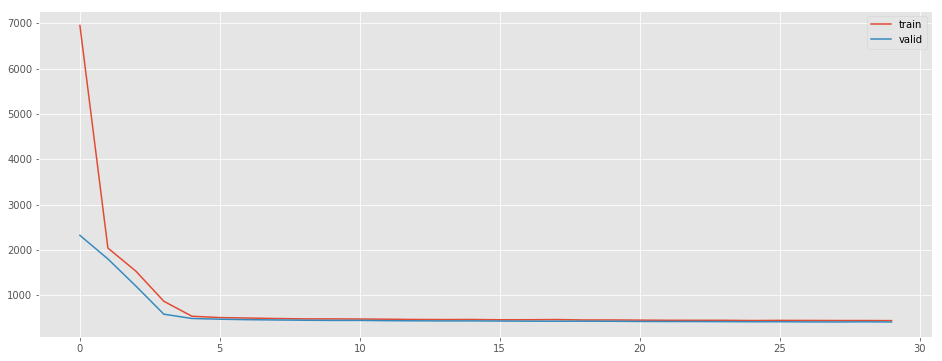

In [262]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid') 
plt.legend()  
plt.show()

## 模型评估

In [263]:
y_pred = model.predict(X_test)

In [264]:
def rmse(predictions,targets):
    return np.sqrt(((predictions-targets)**2).mean())

In [265]:
my_rmse = rmse(y_pred,y_test)

In [266]:
print("rmse: {}".format(my_rmse))

rmse: 81.38250032464867


In [267]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 100)               48800     
_________________________________________________________________
activation_36 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 50)                5050      
_________________________________________________________________
activation_37 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
_________________________________________________________________
activation_38 (Activation)   (None, 1)                 0         
Total para